# Seaborn - 고급 그래프 
: Matplotlib 의 기능과 스타일을 확저안 파이썬 시각 도구의 고급 버전

In [2]:
# warnings ignore
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Seaborn package에서 제공하는 타이타닉 데이터셋
import seaborn as sns

In [4]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
### 회귀선이 있는 산점도
import matplotlib.pyplot as plt

In [6]:
#sns.set_style('whitegrid') # 흰색 격자무늬
sns.set_style('darkgrid')  # 검은 격자무늬
#sns.set_style('dark')  # 검은바탕색

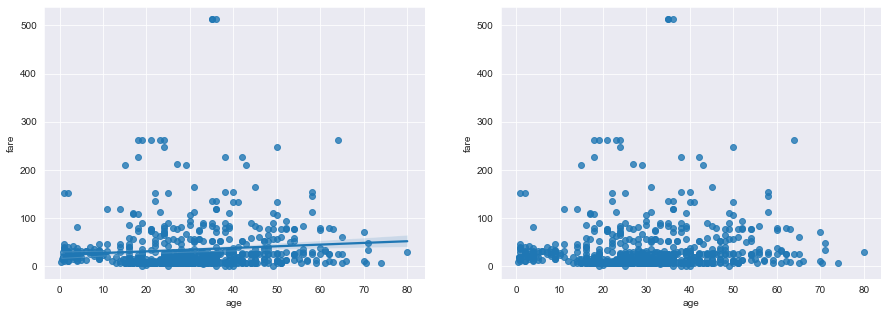

In [7]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)    # 1행 2열 1번째
ax2 = fig.add_subplot(1,2,2)    # 1행 2열 2번째
# 선형 회귀선이 포함된 그래프 그리기 
sns.regplot(
    x= 'age',
    y='fare',
    data = titanic,   # 데이터   
    ax = ax1
)
# 선형 회귀선이 미포함된 그래프 그리기 
sns.regplot(
    x= 'age',
    y='fare',
    data = titanic,   # 데이터   
    ax = ax2,
    fit_reg=False
)
plt.show()

---
# histogram / 커널 밀도 그래프 
: 커널밀도 함수는 그래프와  x축 사이의 면적이 1이 되도록 그리는 밀도 분포 함수 

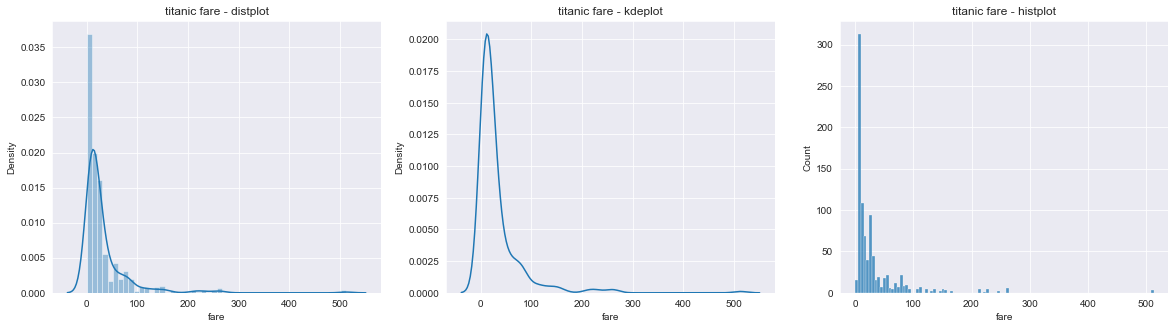

In [8]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 히스토그램 + 커널 밀도 
sns.distplot(titanic['fare'],ax=ax1)

# 커널 민도
sns.kdeplot(titanic['fare'],ax=ax2)

# 히스토그램
sns.histplot(titanic['fare'],ax=ax3)
# 히스토그램- 2
# sns.histplot(x='fare',data=titanic, ax=ax3)
# chart title
ax1.set_title("titanic fare - distplot")
ax2.set_title("titanic fare - kdeplot")
ax3.set_title("titanic fare - histplot")
plt.show()

> fare(운임)이 대부분 100달러 미만에 집중되어 있다

---
### 히트맵(heatmap)
- 2개의 범주형 변수를 각각 x,y축에 넣고 데이터를 매트릭스 형태로 분류 

In [9]:
table = titanic.pivot_table(index=['sex'],
columns=['class'], # class = 객실등급 
aggfunc='size'   #size = 갯수 
) 
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


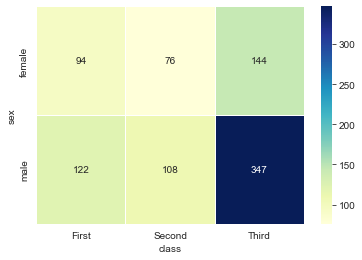

In [10]:
sns.heatmap(
    table,
    annot= True, # 숫자표시 (지수)
    fmt = 'd',       #정수화 , f= 소수
    linewidths=0.5,       # 간격이 생김 
    cmap='YlGnBu',       # yellow~ blue : yellow가 적은 수 , blue: 많은수 
    cbar = True
)
plt.show()

### color 참고
### cmap
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

---
# 범주형 데이터의 산점도
- 범주형 변수에 들어 있는 각 범주별 데이터의 분표를 확인


In [11]:
sns.set_style("whitegrid")


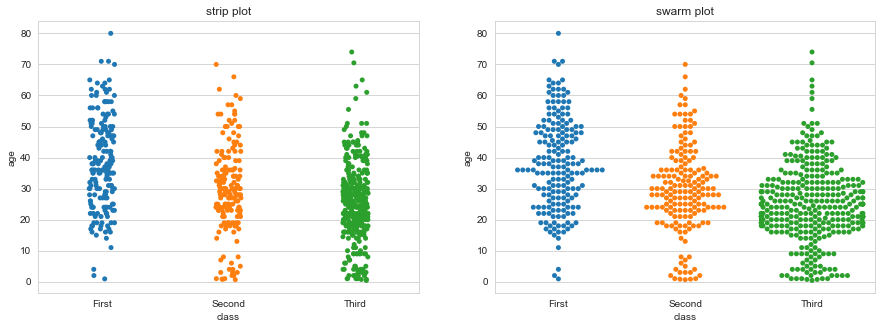

In [12]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,2,1)  # 1행 2열 1번째
ax2 = fig.add_subplot(1,2,2)  # 1행 2열 2번째
# strip = 가느다란 조각 
sns.stripplot(
    x= 'class',  # first,second,third
    y = 'age',
    data = titanic,
    ax = ax1
)
# 퍼짐 
# swarm = 곤충들의 떼
sns.swarmplot(   
    x= 'class',  # first,second,third
    y = 'age',
    data = titanic,
    ax = ax2
)
# chart title
ax1.set_title("strip plot")
ax2.set_title("swarm plot")
plt.show()

---
### 막대그래프

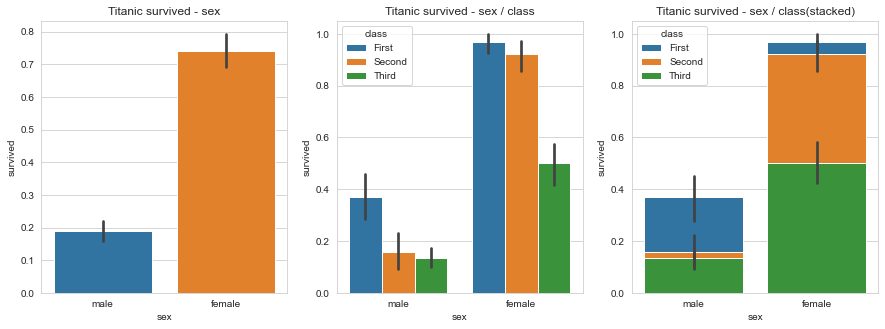

In [13]:
fig = plt.figure(figsize=(15,5))
# 1행 3열 그래프 그리기 
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
# x,y 축의 변수 할당
sns.barplot(
    x='sex',
    y ='survived', # 0,1 
    data= titanic,
    ax=ax1,
    #ci= 'sd'# 표준편차
)
# x, y, hue 데이터 
# 삼차원 데이터를 2차원으로 표현 
sns.barplot(
    x='sex',
    y ='survived', # 0,1 
    hue = 'class',
    data= titanic,
    ax=ax2,
    #ci= 'sd'# 표준편차
)

# x, y, hue 데이터 
# 삼차원 데이터를 2차원으로 표현 
# 누적이 됨 
sns.barplot(
    x='sex',
    y ='survived', # 0,1 
    hue = 'class',
    dodge= False,  #default =true => ax2의 그래프와 같은 모양 
    data= titanic,
    ax=ax3,
    #ci= 'sd'# 표준편차
)

# chart title
ax1.set_title("Titanic survived - sex")
ax2.set_title("Titanic survived - sex / class")
ax3.set_title("Titanic survived - sex / class(stacked)")

plt.show()

- seaborn package에서 제공하는 error bar 
- ax1의 black bar => 오차막대(error bar)
- 남성의 오차범위가 더 좁다. 더 정확함
- ax2의 black bar
- class별로 오차범위가 다르다
- 데이터가 적은데 오차범위가 넓으면 데이터 분포가 띄엄띄엄하다는 뜻
- ax3의 black bar
- 오차막대가 겹쳐있으므로 ax2로 확인 
> 신뢰구간 95%의 오차범위 

---
### 빈도그래프 

In [14]:
sns.set_style("whitegrid")

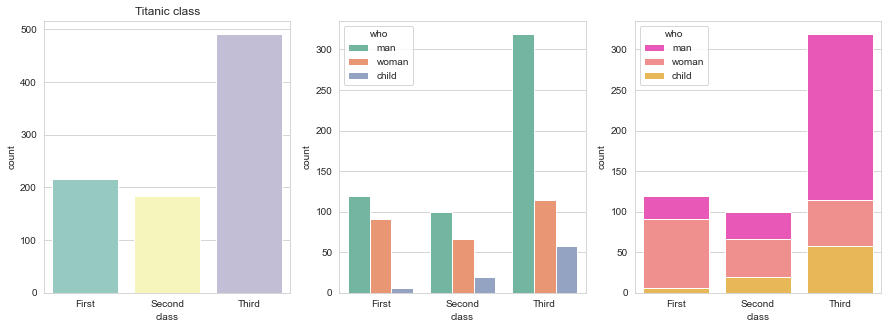

In [33]:
fig = plt.figure(figsize =(15,5))
# 1행 3열 
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 선실 등급별
sns.countplot(
    x= 'class',
    data = titanic,
    palette = "Set3",  # color palette
    ax = ax1
)
# hue
sns.countplot(
    x= 'class',
    hue = 'who',    # who 로 나누기 
    data = titanic,
    palette = "Set2",  # color palette
    ax = ax2
)
# stackd
sns.countplot(
    x= 'class',
    hue = 'who',    # who 로 나누기 
    data = titanic,
    palette = "spring",  # color palette
    # error 걸려서 에러 메세지에 있는 내용으로 넣기 
    dodge=False,
    ax = ax3
)
# chart title
ax1.set_title("Titanic class")

plt.show()

In [22]:
titanic.who

0        man
1      woman
2      woman
3      woman
4        man
       ...  
886      man
887    woman
888    woman
889      man
890      man
Name: who, Length: 891, dtype: object

---
# 박스플롯. 바이올린 그래프
- 박스플롯은 범주형 데이터에 분포와 주요 통계지표를 함께 제공하지만 데이터가 퍼져있는 분산의 정도를 알기 어렵다.
- 바이올린 그래프:  박스플롯에 커널 밀도 함수그래프 추가

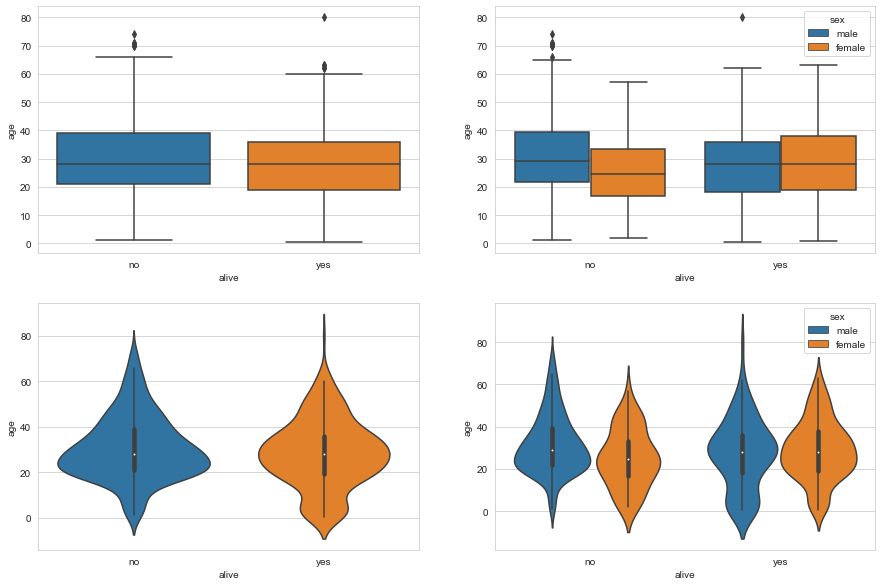

In [41]:
# 연령대에 따른 생존률 그리기 
fig = plt.figure(figsize = (15,10))
# 2행 2열 그래프 그리기 
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# boxplot : 기본값  -1
sns.boxplot(
    x ='alive',
    y = 'age',
    data = titanic,
    ax = ax1,  # 위치
)

# boxplot : 기본값 - hue  -2
sns.boxplot(
    x ='alive',
    y = 'age',
    hue = 'sex',
    data = titanic,
    ax = ax2,  # 위치
)

# violinplot : 기본값  -3
sns.violinplot(
    x ='alive',
    y = 'age',
    data = titanic,
    ax = ax3,  # 위치
)

# boxplot : 기본값 - hue  -4
sns.violinplot(
    x ='alive',
    y = 'age',
    hue = 'sex',
    data = titanic,
    ax = ax4,  # 위치
)

plt.show()

> 바이올린플롯에 가운데 축은 박스플롯을 나타낸 것 

---
### 조인트 그래프
- 산점도를 기본으로 표시하고 각 축에 대한 히스토그램을 동시 제공 

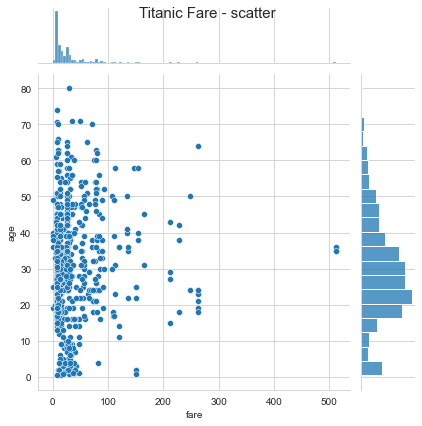

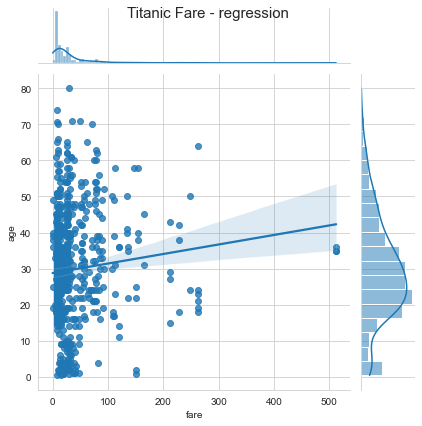

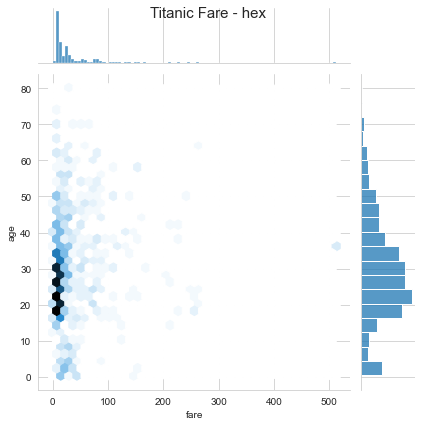

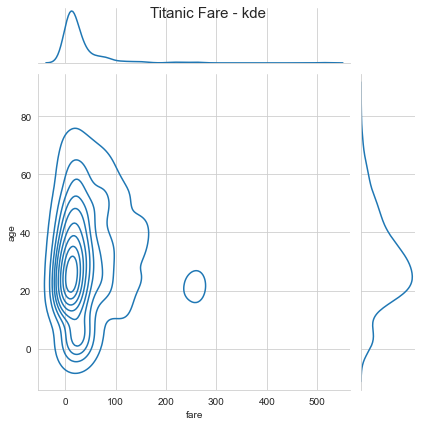

In [47]:
# 조인트 그래프 : 산점도(기본값)
# 요금에 따른 나이 
j1 = sns.jointplot(
    x= 'fare',
    y= 'age',
    data = titanic
)
# 회귀선
j2 = sns.jointplot(
    x= 'fare',
    y= 'age',
    kind = 'reg',
    data = titanic,
)
# 조인트 그래프 : 육각형 
j3 = sns.jointplot(
    x= 'fare',
    y= 'age',
    kind = 'hex',
    data = titanic,
)
# 조인트 그래프 : 커널밀집 그래프
# 선의 간격이 멀수록 퍼져있다
j4 = sns.jointplot(
    x= 'fare',
    y= 'age',
    kind = 'kde',  
    data = titanic,
)

j1.fig.suptitle("Titanic Fare - scatter ", size =15)
j2.fig.suptitle("Titanic Fare - regression ", size =15)
j3.fig.suptitle("Titanic Fare - hex ", size =15)
j4.fig.suptitle("Titanic Fare - kde ", size =15)
plt.show()

---
### 조건을 적용하여 화면을 그리드로 분할하기

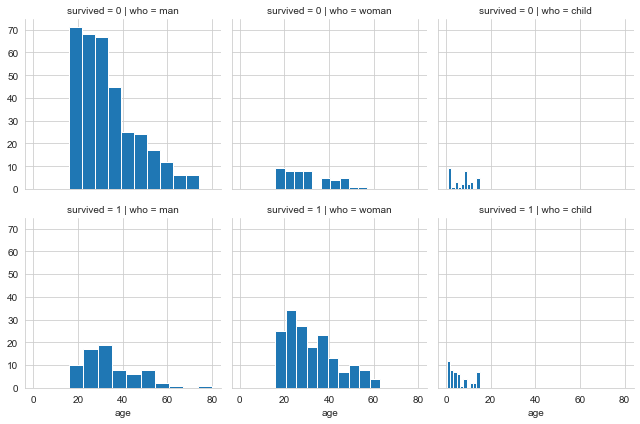

In [50]:
# 조건에 따라 Grid 나누기
g = sns.FacetGrid(
    data=titanic,
    col = 'who',  # column name
    row = 'survived' # row name
)
g = g.map(plt.hist,'age')

---
### 이변수 데이터 분포 
- 매트릭스 형태로 짝을 지어 표현

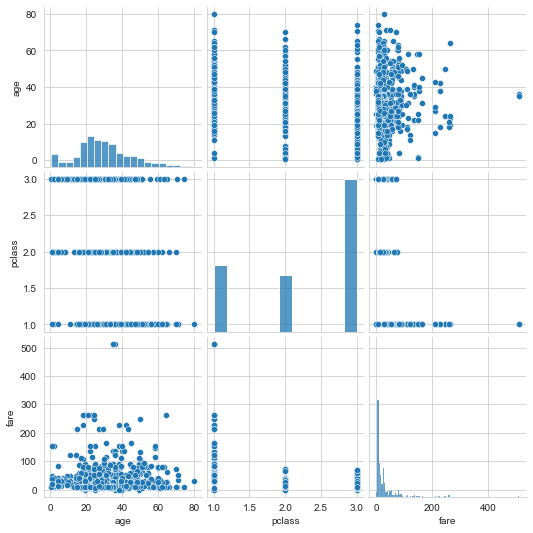

In [51]:
# titanic 데이터 셋중에서 분석 데이터 선택하기 
titanic_pair = titanic[['age','pclass','fare']]

# 조건에 따라 그리드 나누기
sns.pairplot(titanic_pair)
# 같은 x축과 y축이면 히스토그램으로 나타남 